# Caracterización de las Imagenes Modelo InsightFace 

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import pandas as pd
from tqdm import tqdm

# Para visualización en Jupyter
%matplotlib inline


In [24]:
# Ruta base donde están tus imágenes
ruta_base = Path("G:/Mi unidad/APIUX-TECH/MIDV_Project/data/images")

# Listar subcarpetas (por país o tipo de documento)
carpetas = [c for c in ruta_base.iterdir() if c.is_dir()]
print("📂 Carpetas encontradas:", [c.name for c in carpetas])


📂 Carpetas encontradas: ['alb_id', 'aze_passport', 'esp_id', 'est_id', 'fin_id', 'grc_passport', 'lva_passport', 'rus_internalpassport', 'srb_passport', 'svk_id']


In [25]:
def mostrar_imagen(ruta):
    img = cv2.imread(str(ruta))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(ruta.name)
    plt.axis("off")
    plt.show()


📁 alb_id - mostrando 00.jpg


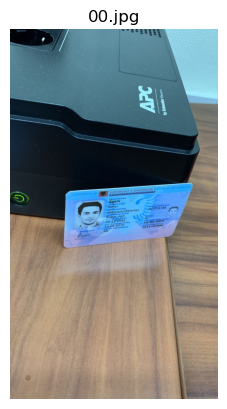

📁 aze_passport - mostrando 00.jpg


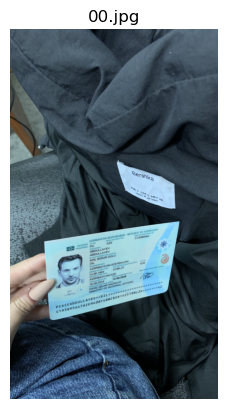

📁 esp_id - mostrando 00.jpg


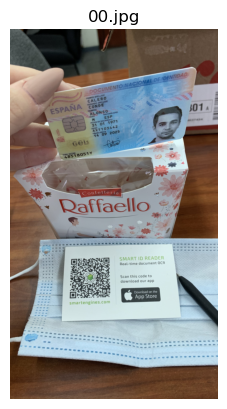

📁 est_id - mostrando 00.jpg


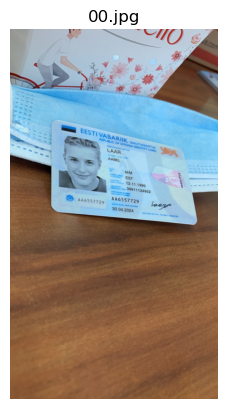

📁 fin_id - mostrando 00.jpg


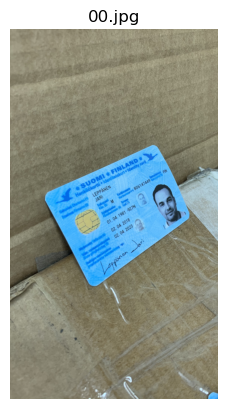

📁 grc_passport - mostrando 00.jpg


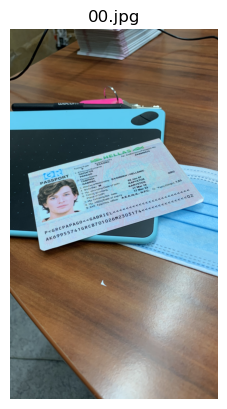

📁 lva_passport - mostrando 00.jpg


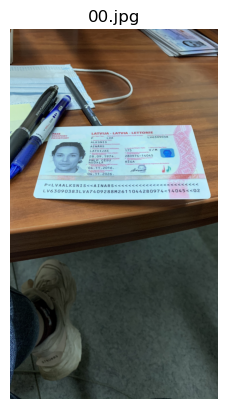

📁 rus_internalpassport - mostrando 00.jpg


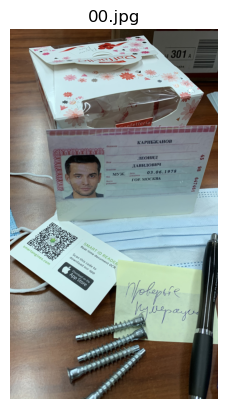

📁 srb_passport - mostrando 00.jpg


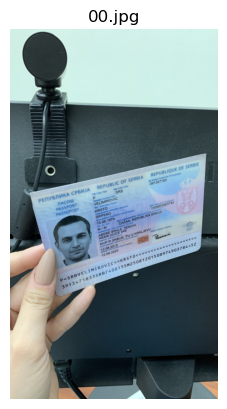

📁 svk_id - mostrando 00.jpg


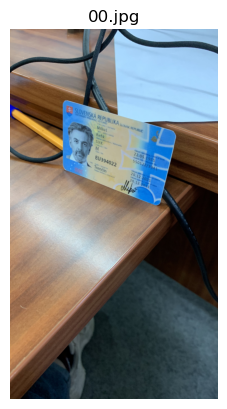

In [26]:
for carpeta in carpetas:
    imagenes = list(carpeta.glob("*.jpg"))
    if imagenes:
        print(f"📁 {carpeta.name} - mostrando {imagenes[0].name}")
        mostrar_imagen(imagenes[0])


In [27]:
from insightface.app import FaceAnalysis

model = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
model.prepare(ctx_id=0)

print("✅ InsightFace cargado en CPU")


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\yasmi/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\yasmi/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\yasmi/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\yasmi/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\yasmi/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

# Función para obtener el embedding

In [28]:
def obtener_embedding(ruta_img):
    try:
        img = np.array(Image.open(ruta_img).convert("RGB"))
        faces = model.get(img)
        if faces:
            return faces[0].embedding
        else:
            print(f"❌ No se detectó rostro en: {ruta_img.name}")
            return None
    except Exception as e:
        print(f"⚠️ Error procesando {ruta_img.name}: {e}")
        return None


In [29]:
imagenes = list(ruta_base.rglob("*.jpg"))[:100]  
resultados = []

for ruta in tqdm(imagenes):
    emb = obtener_embedding(ruta)
    if emb is not None:
        resultados.append({
            "ruta": str(ruta),
            "documento": ruta.parts[-2],
            "nombre": ruta.name,
            **{f"dim_{i}": val for i, val in enumerate(emb)}
        })

df = pd.DataFrame(resultados)
df.to_csv("embeddings_faces_test.csv", index=False)
print("✅ Embeddings guardados en CSV de prueba")


 12%|█▏        | 12/100 [00:06<00:35,  2.45it/s]

❌ No se detectó rostro en: 10.jpg
❌ No se detectó rostro en: 11.jpg


 13%|█▎        | 13/100 [00:07<00:30,  2.86it/s]

❌ No se detectó rostro en: 12.jpg


 14%|█▍        | 14/100 [00:07<00:26,  3.23it/s]

❌ No se detectó rostro en: 13.jpg


 16%|█▌        | 16/100 [00:08<00:25,  3.31it/s]

❌ No se detectó rostro en: 15.jpg


 17%|█▋        | 17/100 [00:08<00:23,  3.57it/s]

❌ No se detectó rostro en: 16.jpg


 18%|█▊        | 18/100 [00:08<00:21,  3.83it/s]

❌ No se detectó rostro en: 17.jpg


 20%|██        | 20/100 [00:09<00:24,  3.24it/s]

❌ No se detectó rostro en: 19.jpg


 27%|██▋       | 27/100 [00:13<00:35,  2.06it/s]

❌ No se detectó rostro en: 26.jpg


 28%|██▊       | 28/100 [00:13<00:29,  2.48it/s]

❌ No se detectó rostro en: 27.jpg


 29%|██▉       | 29/100 [00:14<00:24,  2.88it/s]

❌ No se detectó rostro en: 28.jpg


 30%|███       | 30/100 [00:14<00:22,  3.05it/s]

❌ No se detectó rostro en: 29.jpg


 36%|███▌      | 36/100 [00:18<00:35,  1.80it/s]

❌ No se detectó rostro en: 35.jpg


 37%|███▋      | 37/100 [00:18<00:29,  2.16it/s]

❌ No se detectó rostro en: 36.jpg


 38%|███▊      | 38/100 [00:18<00:24,  2.55it/s]

❌ No se detectó rostro en: 37.jpg
❌ No se detectó rostro en: 38.jpg


 40%|████      | 40/100 [00:19<00:18,  3.32it/s]

❌ No se detectó rostro en: 39.jpg


 46%|████▌     | 46/100 [00:22<00:26,  2.07it/s]

❌ No se detectó rostro en: 45.jpg


 47%|████▋     | 47/100 [00:22<00:21,  2.47it/s]

❌ No se detectó rostro en: 46.jpg
❌ No se detectó rostro en: 47.jpg


 49%|████▉     | 49/100 [00:23<00:15,  3.19it/s]

❌ No se detectó rostro en: 48.jpg


 50%|█████     | 50/100 [00:23<00:14,  3.51it/s]

❌ No se detectó rostro en: 49.jpg


 56%|█████▌    | 56/100 [00:27<00:23,  1.84it/s]

❌ No se detectó rostro en: 55.jpg
❌ No se detectó rostro en: 56.jpg


 59%|█████▉    | 59/100 [00:28<00:13,  3.09it/s]

❌ No se detectó rostro en: 57.jpg
❌ No se detectó rostro en: 58.jpg


 60%|██████    | 60/100 [00:28<00:11,  3.44it/s]

❌ No se detectó rostro en: 59.jpg


 67%|██████▋   | 67/100 [00:31<00:11,  2.78it/s]

❌ No se detectó rostro en: 65.jpg
❌ No se detectó rostro en: 66.jpg


 68%|██████▊   | 68/100 [00:31<00:10,  3.19it/s]

❌ No se detectó rostro en: 67.jpg


 70%|███████   | 70/100 [00:32<00:08,  3.69it/s]

❌ No se detectó rostro en: 68.jpg
❌ No se detectó rostro en: 69.jpg


 81%|████████  | 81/100 [00:39<00:10,  1.87it/s]

❌ No se detectó rostro en: 80.jpg


 82%|████████▏ | 82/100 [00:39<00:08,  2.18it/s]

❌ No se detectó rostro en: 81.jpg


 83%|████████▎ | 83/100 [00:39<00:06,  2.62it/s]

❌ No se detectó rostro en: 82.jpg


 84%|████████▍ | 84/100 [00:39<00:05,  3.02it/s]

❌ No se detectó rostro en: 83.jpg


 85%|████████▌ | 85/100 [00:40<00:04,  3.37it/s]

❌ No se detectó rostro en: 84.jpg


 86%|████████▌ | 86/100 [00:40<00:03,  3.67it/s]

❌ No se detectó rostro en: 85.jpg


 87%|████████▋ | 87/100 [00:40<00:03,  3.90it/s]

❌ No se detectó rostro en: 86.jpg


 88%|████████▊ | 88/100 [00:40<00:02,  4.06it/s]

❌ No se detectó rostro en: 87.jpg


 89%|████████▉ | 89/100 [00:41<00:02,  4.10it/s]

❌ No se detectó rostro en: 88.jpg


 90%|█████████ | 90/100 [00:41<00:02,  4.10it/s]

❌ No se detectó rostro en: 89.jpg


 96%|█████████▌| 96/100 [00:45<00:02,  1.97it/s]

❌ No se detectó rostro en: 95.jpg


 97%|█████████▋| 97/100 [00:45<00:01,  2.38it/s]

❌ No se detectó rostro en: 96.jpg


 98%|█████████▊| 98/100 [00:45<00:00,  2.79it/s]

❌ No se detectó rostro en: 97.jpg


100%|██████████| 100/100 [00:46<00:00,  2.17it/s]

❌ No se detectó rostro en: 99.jpg
✅ Embeddings guardados en CSV de prueba


## Detectar rostros usando InsightFace.

In [30]:
from PIL import Image

imagenes = list(Path("G:/Mi unidad/APIUX-TECH/MIDV_Project/data/images").rglob("*.jpg"))[:100]

detecciones = []

for ruta in tqdm(imagenes):
    try:
        img = np.array(Image.open(ruta).convert("RGB"))
        faces = model.get(img)
        detecciones.append((ruta, len(faces)))
    except Exception as e:
        print(f"⚠️ Error en {ruta.name}: {e}")
        detecciones.append((ruta, 0))


100%|██████████| 100/100 [00:49<00:00,  2.02it/s]


❌ Total imágenes sin rostro detectado: 46
📁 alb_id | 🖼️ 10.jpg


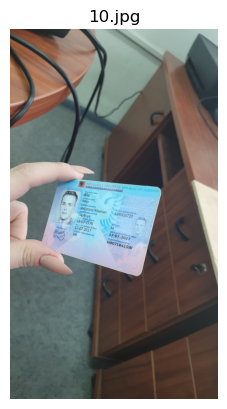

📁 alb_id | 🖼️ 11.jpg


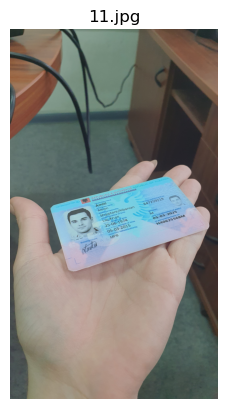

📁 alb_id | 🖼️ 12.jpg


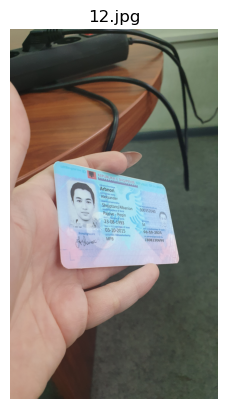

📁 alb_id | 🖼️ 13.jpg


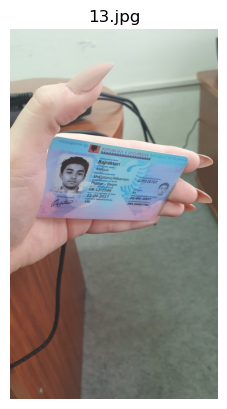

📁 alb_id | 🖼️ 15.jpg


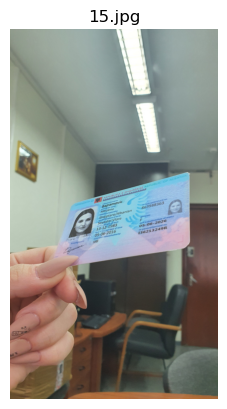

📁 alb_id | 🖼️ 16.jpg


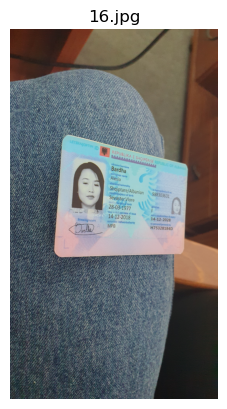

📁 alb_id | 🖼️ 17.jpg


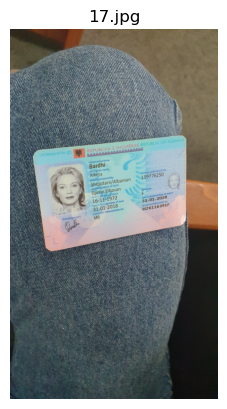

📁 alb_id | 🖼️ 19.jpg


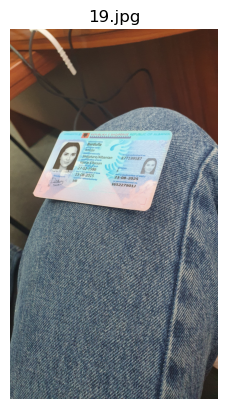

📁 alb_id | 🖼️ 26.jpg


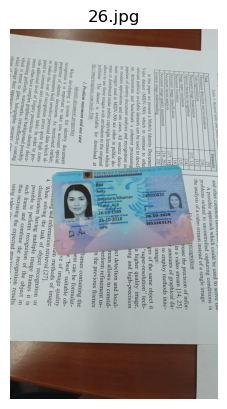

📁 alb_id | 🖼️ 27.jpg


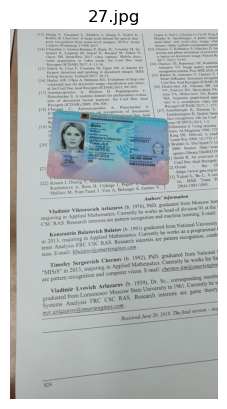

📁 alb_id | 🖼️ 28.jpg


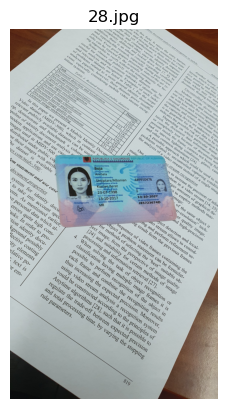

📁 alb_id | 🖼️ 29.jpg


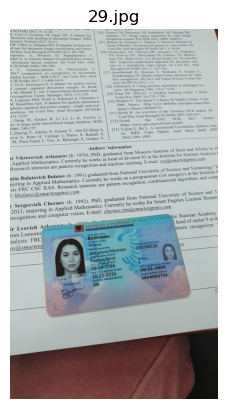

📁 alb_id | 🖼️ 35.jpg


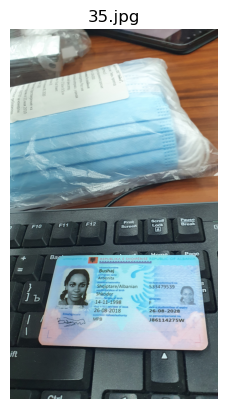

📁 alb_id | 🖼️ 36.jpg


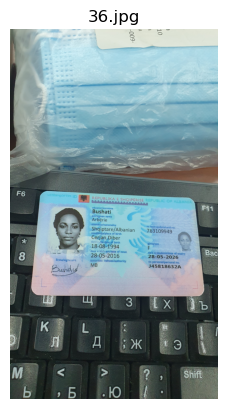

📁 alb_id | 🖼️ 37.jpg


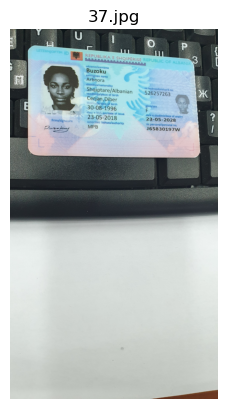

In [31]:
# Mostrar primeras 5 imágenes que NO tuvieron rostro detectado
fallidas = [(ruta, n) for ruta, n in detecciones if n == 0]

print(f"❌ Total imágenes sin rostro detectado: {len(fallidas)}")

for ruta, _ in fallidas[:15]:  # Cuantas imprimo 
    print(f"📁 {ruta.parts[-2]} | 🖼️ {ruta.name}")
    mostrar_imagen(ruta)


# Comparar con anotaciones .json

In [32]:
def cargar_rostros_anotados(json_path):
    import json
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
        
    imagenes_con_rostro = set()
    
    for item in data["_via_img_metadata"].values():
        for region in item["regions"]:
            if region["region_attributes"].get("field_name") == "face":
                imagenes_con_rostro.add(item["filename"])
    
    return imagenes_con_rostro


In [33]:
# Ejemplo de detección si no la tienes:
detecciones = []

for ruta in tqdm(imagenes[:100]):
    img = np.array(Image.open(ruta).convert("RGB"))
    faces = model.get(img)
    detecciones.append((ruta, len(faces)))


100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


😥 Fallos detectados: 46
❌ alb_id/10.jpg


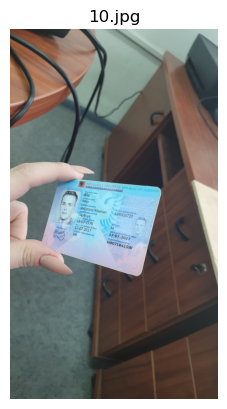

❌ alb_id/11.jpg


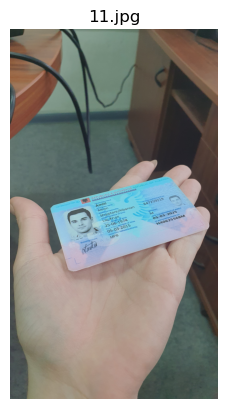

❌ alb_id/12.jpg


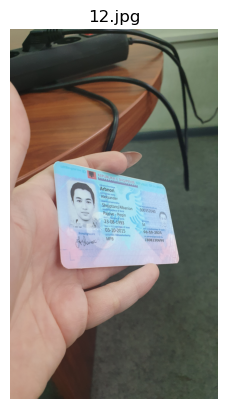

❌ alb_id/13.jpg


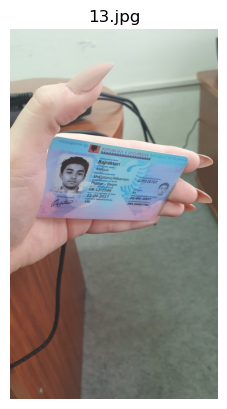

❌ alb_id/15.jpg


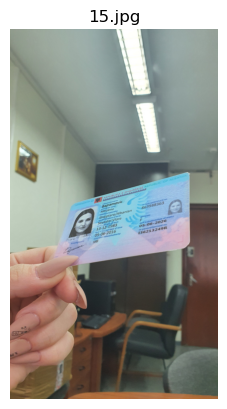

In [34]:
# Cargar anotaciones del archivo que corresponde a las imágenes usadas
json_path = "G:/Mi unidad/APIUX-TECH/MIDV_Project/data/annotations/esp_id.json"
anotadas = cargar_rostros_anotados(json_path)

fallos = [
    ruta for ruta, num_faces in detecciones
    if num_faces == 0 and ruta.name in anotadas
]

print(f"😥 Fallos detectados: {len(fallos)}")

# Mostrar algunas imágenes fallidas
for ruta in fallos[:5]:
    print(f"❌ {ruta.parts[-2]}/{ruta.name}")
    mostrar_imagen(ruta)


In [35]:
# Paso 1: cargar anotaciones
json_path = "G:/Mi unidad/APIUX-TECH/MIDV_Project/data/annotations/esp_id.json"
anotadas = cargar_rostros_anotados(json_path)

# Paso 2: contar cuántas se detectaron bien
total_esperadas = 0
detectadas = 0

for ruta, num_faces in detecciones:
    if ruta.name in anotadas:
        total_esperadas += 1
        if num_faces > 0:
            detectadas += 1

# Paso 3: calcular recall
recall = detectadas / total_esperadas if total_esperadas > 0 else 0

print(f"✅ Imágenes con rostro anotado: {total_esperadas}")
print(f"🧠 InsightFace detectó rostro en: {detectadas}")
print(f"📈 RECALL (detección correcta): {recall:.2%}")


✅ Imágenes con rostro anotado: 100
🧠 InsightFace detectó rostro en: 54
📈 RECALL (detección correcta): 54.00%
